In [76]:
import pandas as pd
import numpy as np

#--------------
from sklearn import feature_selection
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from imblearn.over_sampling import RandomOverSampler

#------------
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.model_selection import cross_val_score, StratifiedShuffleSplit, KFold
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.linear_model import SGDClassifier, RANSACRegressor, SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingRegressor
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, SVR

#-------------
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#-----------
np.set_printoptions(suppress=True)
pd.options.display.float_format = '{:,.2f}'.format

#---------------
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.manifold import LocallyLinearEmbedding, TSNE,Isomap, MDS
from sklearn.metrics import homogeneity_score, silhouette_score, mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from scipy.stats import multivariate_normal

# Obesity Level Dataset

The source of the data is the paper called **Dataset for estimation of obesity levels based on eating habits and physical condition in individuals from Colombia, Peru and Mexico** by Fabio Mendoza Palechor and Alexis de la Hoz Manotas from the Universidad de la Costa, CUC in Colombia, published in Elsevier journal and sourced from the [UCI website](https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+#). The paper presents data for the estimation of obesity levels of individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. To balance the dataset 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.

In [2]:
data=pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
# data=pd.read_csv('ObesityDataSet.csv')
data.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female 21.00    1.62   64.00                            yes   no  2.00   
1  Female 21.00    1.52   56.00                            yes   no  3.00   
2    Male 23.00    1.80   77.00                            yes   no  2.00   
3    Male 27.00    1.80   87.00                             no   no  3.00   
4    Male 22.00    1.78   89.80                             no   no  2.00   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0 3.00  Sometimes    no  2.00   no 0.00 1.00          no   
1 3.00  Sometimes   yes  3.00  yes 3.00 0.00   Sometimes   
2 3.00  Sometimes    no  2.00   no 2.00 1.00  Frequently   
3 3.00  Sometimes    no  2.00   no 2.00 0.00  Frequently   
4 1.00  Sometimes    no  2.00   no 0.00 0.00   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

Attributes related with eating habbits
- Frequent consumption of high caloric food (FAVC), 
- Frequency of consumption of vegetables(FCVC), Number of main meals (NCP)
- Consumption of food between meals (CAEC)
- Consumption ofwater daily (CH20)
- Consumption of alcohol (CALC). 

The attributes related with the physicalcondition are: 
- Calories consumption monitoring (SCC)
- Physical activity frequency (FAF), 
- Time usingtechnology devices (TUE), 
- Transportation used (MTRANS), 

other variables obtained were: 
- Gender, 
- Age,
- Height
- Weight.

In [4]:
data['BMI'] = data.Weight/ data.Height**2   #----------------------ADDED
data.rename(columns={'family_history_with_overweight': 'FHO'}, inplace=True) #--------------ADDED

In [5]:
data.head(5)

Gender   Age  Height  Weight  FHO FAVC  FCVC  NCP       CAEC SMOKE  CH2O  \
0  Female 21.00    1.62   64.00  yes   no  2.00 3.00  Sometimes    no  2.00   
1  Female 21.00    1.52   56.00  yes   no  3.00 3.00  Sometimes   yes  3.00   
2    Male 23.00    1.80   77.00  yes   no  2.00 3.00  Sometimes    no  2.00   
3    Male 27.00    1.80   87.00   no   no  3.00 3.00  Sometimes    no  2.00   
4    Male 22.00    1.78   89.80   no   no  2.00 1.00  Sometimes    no  2.00   

   SCC  FAF  TUE        CALC                 MTRANS           NObeyesdad   BMI  
0   no 0.00 1.00          no  Public_Transportation        Normal_Weight 24.39  
1  yes 3.00 0.00   Sometimes  Public_Transportation        Normal_Weight 24.24  
2   no 2.00 1.00  Frequently  Public_Transportation        Normal_Weight 23.77  
3   no 2.00 0.00  Frequently                Walking   Overweight_Level_I 26.85  
4   no 0.00 0.00   Sometimes  Public_Transportation  Overweight_Level_II 28.34

# Descriptive analysis

In [7]:
data.describe()  # BMI --> need dataframe of all continuous variables include BMI

Age   Height   Weight     FCVC      NCP     CH2O      FAF      TUE  \
count 2,111.00 2,111.00 2,111.00 2,111.00 2,111.00 2,111.00 2,111.00 2,111.00   
mean     24.31     1.70    86.59     2.42     2.69     2.01     1.01     0.66   
std       6.35     0.09    26.19     0.53     0.78     0.61     0.85     0.61   
min      14.00     1.45    39.00     1.00     1.00     1.00     0.00     0.00   
25%      19.95     1.63    65.47     2.00     2.66     1.58     0.12     0.00   
50%      22.78     1.70    83.00     2.39     3.00     2.00     1.00     0.63   
75%      26.00     1.77   107.43     3.00     3.00     2.48     1.67     1.00   
max      61.00     1.98   173.00     3.00     4.00     3.00     3.00     2.00   

           BMI  
count 2,111.00  
mean     29.70  
std       8.01  
min      13.00  
25%      24.33  
50%      28.72  
75%      36.02  
max      50.81

In [8]:
data.describe(include=['O'])

Gender   FHO  FAVC       CAEC SMOKE   SCC       CALC  \
count    2111  2111  2111       2111  2111  2111       2111   
unique      2     2     2          4     2     2          4   
top      Male   yes   yes  Sometimes    no    no  Sometimes   
freq     1068  1726  1866       1765  2067  2015       1401   

                       MTRANS      NObeyesdad  
count                    2111            2111  
unique                      5               7  
top     Public_Transportation  Obesity_Type_I  
freq                     1580             351

In [9]:
fig = make_subplots(rows=4, cols=2, 
                    subplot_titles=("Family history with over-weight",
                                    "Smoke", 
                                    "Comsumption of high caloric food",
                                    "Consumption of alcohol",
                                    "Calories consumption monitoring",
                                    "Transportation used",
                                    "Consumption of food between meals",
                                    "Gender"))

fig.add_trace(go.Bar(x =data['FHO'].value_counts().index.tolist(),
                     y = data['FHO'].value_counts().values.tolist()), row=1, col=1)

fig.add_trace(go.Bar(x=data['SMOKE'].value_counts().index.tolist(),
                         y=data['SMOKE'].value_counts().values.tolist()),row=1, col=2)

fig.add_trace(go.Bar(x=data['FAVC'].value_counts().index.tolist(),
                         y=data['FAVC'].value_counts().values.tolist()),row=2, col=1)

fig.add_trace(go.Bar(x=data['CALC'].value_counts().index.tolist(),
                         y=data['CALC'].value_counts().values.tolist()),row=2, col=2)

fig.add_trace(go.Bar(x=data['SCC'].value_counts().index.tolist(),
                         y=data['SCC'].value_counts().values.tolist()),row=3, col=1)

fig.add_trace(go.Bar(x=data['MTRANS'].value_counts().index.tolist(),
                         y=data['MTRANS'].value_counts().values.tolist()),row=3, col=2)

fig.add_trace(go.Bar(x=data['CAEC'].value_counts().index.tolist(),
                         y=data['CAEC'].value_counts().values.tolist()),row=4, col=1)

fig.add_trace(go.Bar(x=data['Gender'].value_counts().index.tolist(),
                         y=data['Gender'].value_counts().values.tolist()),row=4, col=2)

              
fig.update_layout(height=1000, width=800,showlegend=False, title_text="Categorical features")
fig.show()

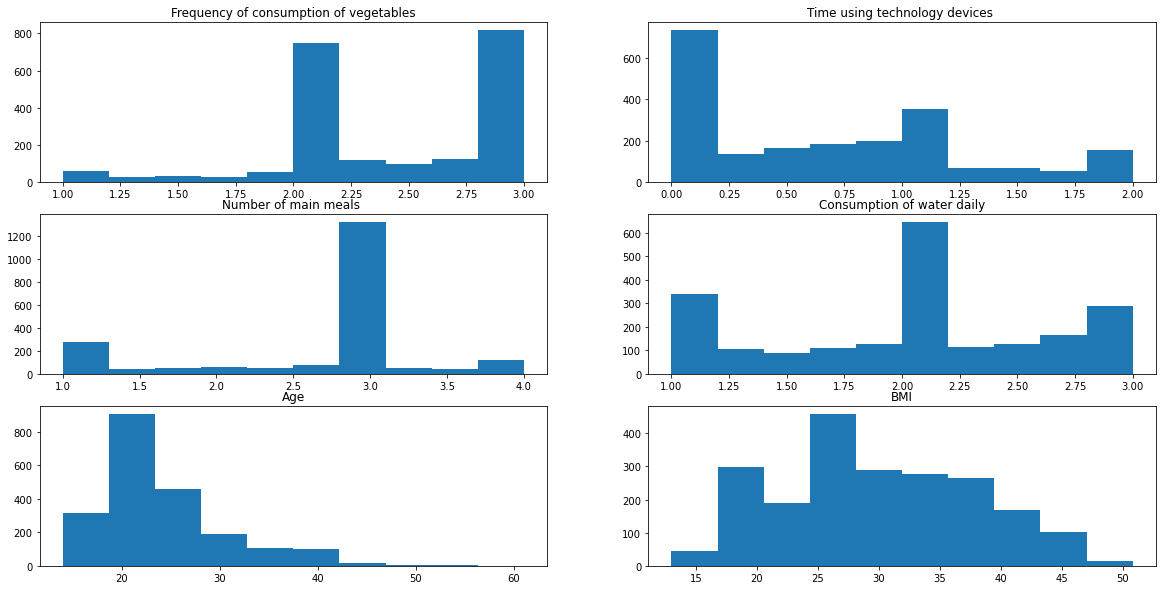

In [10]:
fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize=(20, 10))
ax[0,0].hist(data.FCVC)
ax[0,0].set_title('Frequency of consumption of vegetables')
ax[0,1].hist(data.TUE)
ax[0,1].set_title('Time using technology devices ')
ax[1,0].hist(data.NCP)
ax[1,0].set_title('Number of main meals ')
ax[1,1].hist(data.CH2O)
ax[1,1].set_title('Consumption of water daily')
ax[2,0].hist(data.Age)
ax[2,0].set_title('Age')
ax[2,1].hist(data.BMI)
ax[2,1].set_title('BMI')

plt.show()

In [11]:
# FHO x BMI x gender
fig = px.box(data, x="FHO", y="BMI", facet_col="Gender", color="Gender", boxmode="overlay",
             title="BMI distribution based on Family history with overweight by Gender",
             points='outliers', labels={"FHO":"Family history with overweight"})
fig.add_hline(y=18.5, line_dash="dot", annotation_text="Underweight", annotation_position="bottom")
fig.add_hline(y=24.9, line_dash="dot", annotation_text="Normal", annotation_position="bottom")
fig.add_hline(y=29.9, line_dash="dot", annotation_text="Overweight", annotation_position="bottom")
fig.add_hline(y=29.9, line_dash="dot", annotation_text="Obesity", annotation_position="top")

# Age x NObeyesdad x gender
fig2 = px.box(data, x="NObeyesdad", y="Age", facet_col="Gender", color="Gender",
              title="Age distribution across Obesity classes by Gender",
              boxmode="overlay", points='outliers', labels={"NObeyesdad":"Obesity level"},
              category_orders={"NObeyesdad":["Insufficient_Weight", "Normal_Weight",
                                             "Overweight_Level_I", "Overweight_Level_II",
                                             "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]})

# MTRANS x Age x gender
fig3 = px.box(data, x="MTRANS", y="Age", facet_col="Gender", color="Gender",
              title="Age distribution across Transportation categories by Gender",
              boxmode="overlay", points='outliers', labels={"MTRANS":"Transportation used"})

# CAEC x FCVC x FHO
fig4 = px.box(data, x="CAEC", y="FCVC", facet_col="Gender", color="Gender",
              boxmode="overlay", points='outliers',
              title="Consuption of vegetables distribution across Food between meals classes by Gender",
              category_orders={"CAEC":["no", "Sometimes", "Frequently", "Always"]},
              labels={"FCVC":"Frequency of consumption of vegetables",
                      "CAEC":"Consumption of food between meals"})

fig.show()
fig2.show()
fig3.show()
fig4.show()

Chart 1:
- The BMI and Family history with overweight ("FHO") correlation coefiecient is 0.50 so this doesn't come as a surprise to see the implication in the above distribution chart as well.
- Interestingly enough, however, although there's almost no strong correlation between BMI and Gender nor FHO and Gender (-0.10 and 0.10, respectively), when splitting BMI vs. FHO per Gender there seems to be a significant difference how different gender's FHO affects the BMI distribution.

Chart 2:
- Similarly to Chart1 gender makes a difference again although there should be hardly any correlation, women seem to be increasing their BMI levels only after passing the 30 years mark, men seem to hit "their" Obesity group in an early stage of life already.
- The only exception in the above observation would be women in the Obesity type II and III which all appear to be in their early 20's.

Chart 3:
- Among both genders we can see an expected transition from more affordable forms of transportation such as biking, walking and public transport in their early stage of life to cars later on. We can assume this comes as a result of higher disposable income (ability to purchase a car) and family status (a need to purchase a car).
- Also women tend to buy cars and motocycles later than men.

Chart 4:
- We might see an impact of the data collection process from this chart as hardly anyone was willing to admit a low consumption of vegetables :) Both genders' values are distributed in the higher levels, however, as we can deduct from the median value women tend to consume more vegebables across all the categories of the Consumption of food between meals feature.
- Also the use of SMOTE caused an issue in the Frequency of Vegetables Consumption feature (and most likely some others too) as many of the originally categorical values are displayed as floats. This problem will have to addressed later on in the preprocessing.

In [12]:
px.bar(data['NObeyesdad'].value_counts(), color = data['NObeyesdad'].value_counts().values, title = 'Obesity level')

Based on the short brief of data information,the categories of obesity levels were unbalanced in the original dataset. And, this presented a learning problem for the data mining methods, since it would learn to identify correctly the category with most records compared with the categories with less data. After the balancing class problem was identified, synthetic data was generated, up to 77% of the data, using the tool Weka and the filter SMOTE. 

# Label Encoding

In [13]:
data1 = data[['Gender', 'FHO', 'FAVC', 'SMOKE', 'SCC']].apply(LabelEncoder().fit_transform)

In [14]:
data2 = pd.get_dummies(data.MTRANS,drop_first=True)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Bike                   2111 non-null   uint8
 1   Motorbike              2111 non-null   uint8
 2   Public_Transportation  2111 non-null   uint8
 3   Walking                2111 non-null   uint8
dtypes: uint8(4)
memory usage: 8.4 KB


In [15]:
data['CALC'].unique()

array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object)

In [16]:
# check back the number label vs text categories
data1['NObeyesdad']=data['NObeyesdad'].map({'Insufficient_Weight':0,'Normal_Weight':1,'Overweight_Level_I':2,'Overweight_Level_II':3,
                        'Obesity_Type_I':4,'Obesity_Type_II':5,
                              'Obesity_Type_III':6})
data1['CAEC']=data['CAEC'].map({'Sometimes':1, 'Frequently':2, 'Always':3, 'no':0})
data1['CALC']=data['CALC'].map({'Sometimes':1, 'Frequently':2, 'Always':3, 'no':0})

In [17]:
data3=data.iloc[:,[6,7,10,12,13,17]].round().astype('int32')

In [18]:
data_total=pd.concat([data.iloc[:,[1,2,3]],data3,data1, data2],axis=1) 

In [19]:
data_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    2111 non-null   float64
 1   Height                 2111 non-null   float64
 2   Weight                 2111 non-null   float64
 3   FCVC                   2111 non-null   int32  
 4   NCP                    2111 non-null   int32  
 5   CH2O                   2111 non-null   int32  
 6   FAF                    2111 non-null   int32  
 7   TUE                    2111 non-null   int32  
 8   BMI                    2111 non-null   int32  
 9   Gender                 2111 non-null   int64  
 10  FHO                    2111 non-null   int64  
 11  FAVC                   2111 non-null   int64  
 12  SMOKE                  2111 non-null   int64  
 13  SCC                    2111 non-null   int64  
 14  NObeyesdad             2111 non-null   int64  
 15  CAEC

## re-name columns names on data_total

In [20]:
data_total.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI',
       'Gender', 'FHO', 'FAVC', 'SMOKE', 'SCC', 'NObeyesdad', 'CAEC', 'CALC',
       'Bike', 'Motorbike', 'Public_Transportation', 'Walking'],
      dtype='object')

In [21]:
data_total.columns=['Age', 'Height', 'Weight', 'Vege', 'Meals', 'Water', 'Physical_act', 'Technology', 'BMI',
       'Gender', 'Family_his', 'Calo_food', 'Smoke', 'Mon_cal', 'Obesity', 'Snack', 'Alko',
       'Bike', 'Motorbike', 'Public_trans', 'Walking']

In [22]:
data_total.head()

Age  Height  Weight  Vege  Meals  Water  Physical_act  Technology  BMI  \
0 21.00    1.62   64.00     2      3      2             0           1   24   
1 21.00    1.52   56.00     3      3      3             3           0   24   
2 23.00    1.80   77.00     2      3      2             2           1   24   
3 27.00    1.80   87.00     3      3      2             2           0   27   
4 22.00    1.78   89.80     2      1      2             0           0   28   

   Gender  ...  Calo_food  Smoke  Mon_cal  Obesity  Snack  Alko  Bike  \
0       0  ...          0      0        0        1      1     0     0   
1       0  ...          0      1        1        1      1     1     0   
2       1  ...          0      0        0        1      1     2     0   
3       1  ...          0      0        0        2      1     2     0   
4       1  ...          0      0        0        3      1     1     0   

   Motorbike  Public_trans  Walking  
0          0             1        0  
1          0             1        0  
2          0             1        0  
3          0             0        1  
4          0             1        0  

[5 rows x 21 columns]

In [23]:
px.box(data_total, x = 'Meals', y = 'Age', facet_col = 'Gender', title  = 'Number of main meals')

In [24]:
px.box(data_total, x = 'Water', y = 'Age', facet_col = 'Gender', title = 'Consumption of water daily')

In [25]:
px.box(data_total, x = 'Vege', y = 'Age', facet_col = 'Gender', title = 'Consumption of vegetable')

In [26]:
px.box(data_total, x = 'Technology', y = 'Age', facet_col = 'Gender', title = 'Time using technology devices')

After converting the columns with float numbers into categorical variables, we use box plot to detect the outliers and see the connection between those variables with age and gender. The Gender value 0 represents Female and value 1 is Male.

# Correlation & Multi-colinearity

## Correlation matrix

In [27]:
corr = data_total.drop(['Height','Weight'], axis=1).corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(1)

EXPLAIN:

Later we won't put Weight and Height in our model since these two variables fomulate BMI score basing on which we categorized Obesity level. We eliminate Weight and Height from our analysis. 

Two variables: BMI and Obesity are the targets of our predictive models, we don't look into correlation between these ones.

We notice some pair of variables which correlation scores are around + or - 0.3, 0.4 or 0.5, hinder mild linear relationship: 
- Family history vs BMI/Obesity
- Public_trans vs Age
- Snack vs Obesity/BMI
- Gender vs Vege
- BMI vs Vege
- Walking vs Public_Trans

We will continue to examine with p-value and VIF later.

Otherwise, risk of multi-colinearity is quite low (feature depends on another)

Link to theory interpretation: https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/how-to/correlation/interpret-the-results/

In [28]:
data_total.columns

Index(['Age', 'Height', 'Weight', 'Vege', 'Meals', 'Water', 'Physical_act',
       'Technology', 'BMI', 'Gender', 'Family_his', 'Calo_food', 'Smoke',
       'Mon_cal', 'Obesity', 'Snack', 'Alko', 'Bike', 'Motorbike',
       'Public_trans', 'Walking'],
      dtype='object')

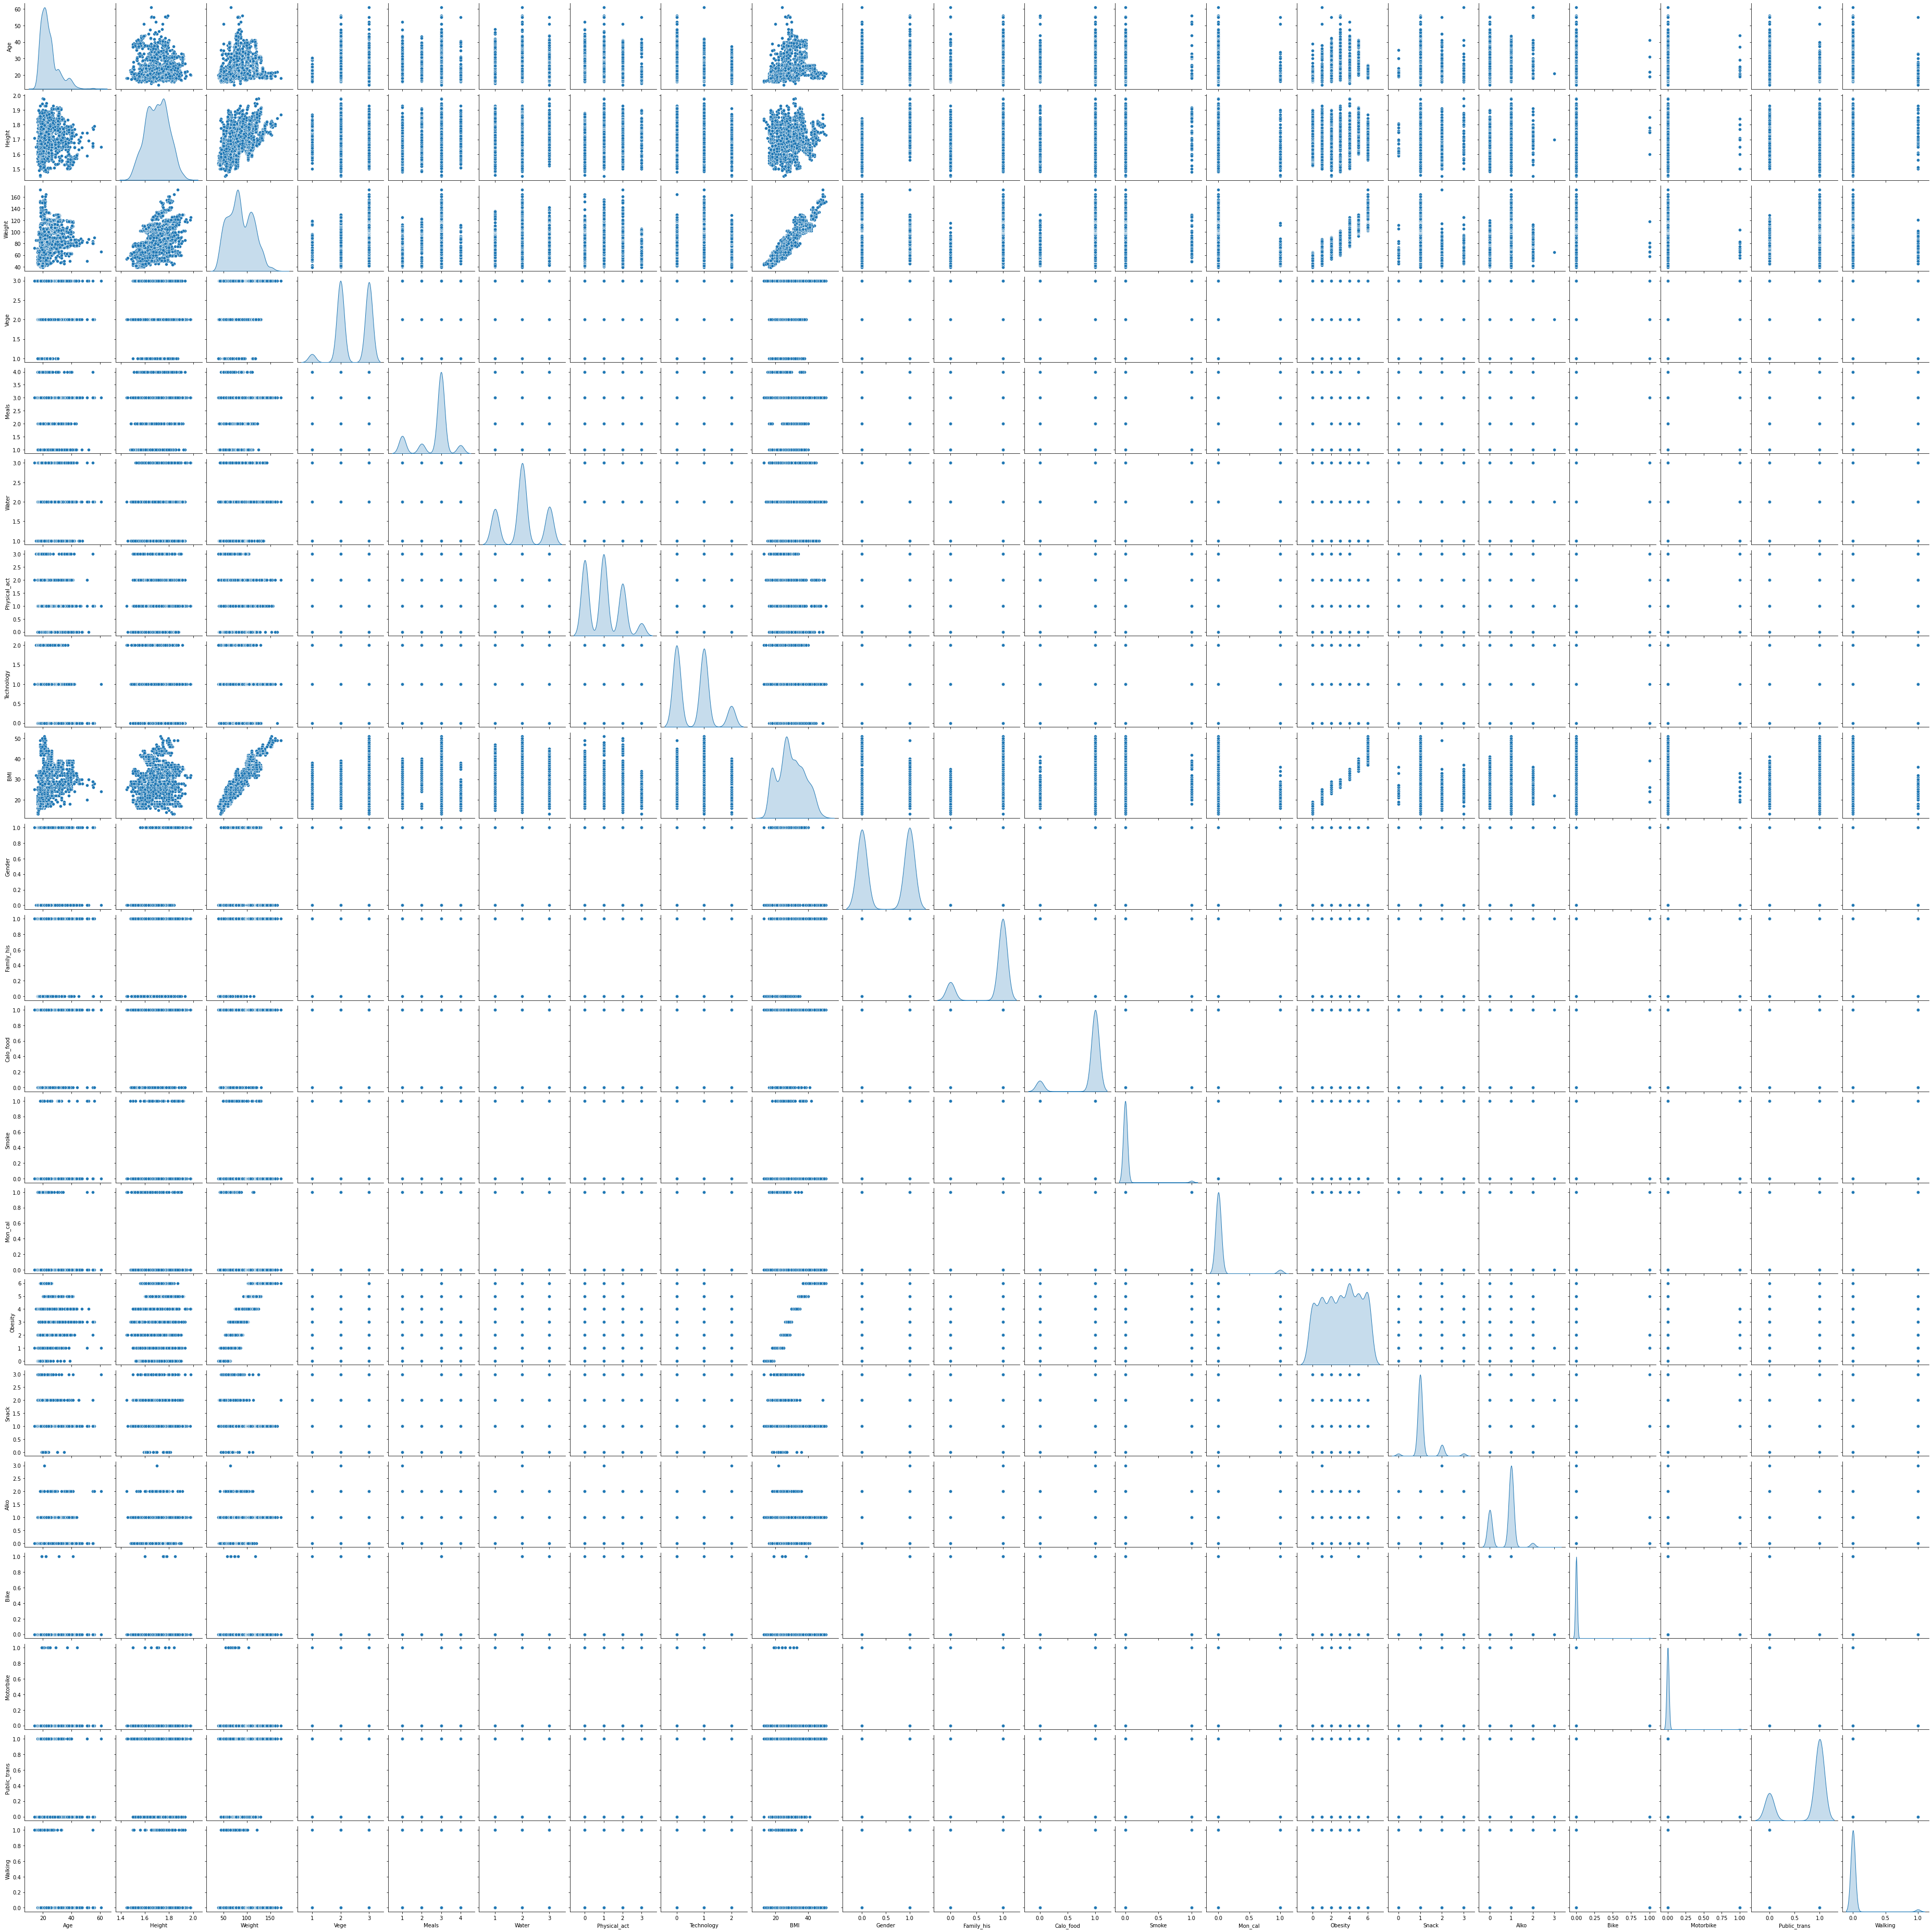

In [29]:
sns.pairplot(data_total, diag_kind="kde")

EXPLAIN: obvious linear relationship between BMI and Weight, somewhat between Height and Weight.

## Split data

In [30]:
X=data_total.drop(['BMI', 'Obesity','Height','Weight'], axis=1).values
Y_reg=data_total.BMI.values
Y_cls=data_total.Obesity.values

In [31]:
X_names=data_total.drop(['BMI', 'Obesity','Height','Weight'], axis=1).columns
X_names

Index(['Age', 'Vege', 'Meals', 'Water', 'Physical_act', 'Technology', 'Gender',
       'Family_his', 'Calo_food', 'Smoke', 'Mon_cal', 'Snack', 'Alko', 'Bike',
       'Motorbike', 'Public_trans', 'Walking'],
      dtype='object')

## VIF

In [32]:
def multicollinearity(model,features,feature_name):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    VIF=[variance_inflation_factor(features,i) for i in range(features.shape[1])]
    for i,v in enumerate(VIF):
        print(f"feature {feature_name[i]}: vif : {v}")
    possible_multicollinearity=sum(map(lambda x: x>10,VIF))
    Multicollinearity=sum([1 for vif in VIF if vif>100])
    print(f"{possible_multicollinearity} case of possible multicollinearity")
    print(f"{Multicollinearity} case of multicollinearity")

In [33]:
multicollinearity(LinearRegression(),X,X_names)

feature Age: vif : 16.31547976891398
feature Vege: vif : 17.60774806097755
feature Meals: vif : 11.569313517804954
feature Water: vif : 9.851687853218273
feature Physical_act: vif : 2.5384508457000803
feature Technology: vif : 2.111928603349352
feature Gender: vif : 2.316845228380526
feature Family_his: vif : 6.496189967592717
feature Calo_food: vif : 9.152568794907657
feature Smoke: vif : 1.0528683607611815
feature Mon_cal: vif : 1.1315249529074052
feature Snack: vif : 6.979445932433769
feature Alko: vif : 3.1870793446498955
feature Bike: vif : 1.0276099633308002
feature Motorbike: vif : 1.0422143899247462
feature Public_trans: vif : 5.240832061865968
feature Walking: vif : 1.1968608343117948
3 case of possible multicollinearity
0 case of multicollinearity


In line with corelation matrix, VIF high in Vege: Vege and Gender  have high cor-coef score. However, correlation matrix shows low corelation between Gender and our targets (obesity, BMI), we can consider elimiminating Gender out of our model.

VIF high in Age: Vege and Public_trans have high cor-coef score. However, correlation matrix shows low corelation between Public_trans and our targets (obesity, BMI), we can consider elimiminating Public_trans out of our model.

# Supervised learning - Regression models

## Scaling and dataset split

There aren't many outliers nor the dataset appears to have a normal distribution, therefore we don't choose the Robust scaler nor the Standard scaler, respectively, for the regression models part of our project. The MinMax scaler will be used to scale the data for further processing.

Then we devide the scaled dataset into train and test data in the ratio of 80:20. This split will be necessary for future evaluation of the models' prediction accuracy.

In [34]:
# original shape of the dataset
X.shape

(2111, 17)

In [35]:
# using the MinMax scaler to scale and transform the original dataset
minmax = MinMaxScaler()
X_scaled = minmax.fit_transform(X)
X_scaled.shape

(2111, 17)

In [36]:
# splitting the scaled data and target for regression models into training and test data

# to keep the output of the functions stable we set the random_state=33 whenever applicable
# in the whole regression models section
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_reg, train_size=0.8, random_state=33)

print(f'Shape of the train dataset: {X_train.shape}, {y_train.shape}')
print(f'Shape of the test dataset: {X_test.shape}, {y_test.shape}')

Shape of the train dataset: (1688, 17), (1688,)
Shape of the test dataset: (423, 17), (423,)


## Model selection

We evaluate the models' performance in their default settings and clarify which of them perform the best on our dataset in general. Based on the results of the cross validation we select the best models to work on further and find the best performing algorithm and its setup for our dataset.

We pick the following algorithm for evaluation - linear regression, gradient descent, RANSAC, support vector machines, decision trees (with 3 various depths) and random forest.

In [37]:
# creating a list of picked algorithms
# the list includes tuples with the model name and the scikit learn algorithm
models = list()
models.append(("LinReg", LinearRegression()))
models.append(("SGD", SGDRegressor(random_state=33)))
models.append(("RANSAC", RANSACRegressor(random_state=33)))
models.append(("SVM", SVR()))
models.append(("DecisionTree_3", DecisionTreeRegressor(max_depth=3, random_state=33)))
models.append(("DecisionTree_6", DecisionTreeRegressor(max_depth=6, random_state=33)))
models.append(("DecisionTree_9", DecisionTreeRegressor(max_depth=9, random_state=33)))
models.append(("RandomForest", RandomForestRegressor(random_state=33)))

In [38]:
models

[('LinReg', LinearRegression()),
 ('SGD', SGDRegressor(random_state=33)),
 ('RANSAC', RANSACRegressor(random_state=33)),
 ('SVM', SVR()),
 ('DecisionTree_3', DecisionTreeRegressor(max_depth=3, random_state=33)),
 ('DecisionTree_6', DecisionTreeRegressor(max_depth=6, random_state=33)),
 ('DecisionTree_9', DecisionTreeRegressor(max_depth=9, random_state=33)),
 ('RandomForest', RandomForestRegressor(random_state=33))]

In [39]:
# running the cross validation on the scaled dataset for all the picked regression models
# the results saved into a dictionary for possible future analysis
# print the avg. score and standard deviation for each model

model_selection = dict()
for name, model in models:
    model_name = name
    model_scores = model_name + "_scores"
    model_score_mean = model_name + "_score_mean"
    model_score_std = model_name + "_score_std"  
    
    mod_scores = cross_val_score(model, X_scaled, Y_reg, cv=5)
    mod_score_mean = round(mod_scores.mean(), 2)
    mod_score_std = round(mod_scores.std(), 2)

    model_selection[model_name] = {model_scores : mod_scores, model_score_mean : mod_score_mean,
                                   model_score_std : mod_score_std}

    print(f"Training set's avg. score with the {model_name} model: {mod_score_mean}")
    print(f"The std. of the {model_name} model: {mod_score_std}\n")

Training set's avg. score with the LinReg model: -5.56
The std. of the LinReg model: 4.94

Training set's avg. score with the SGD model: -5.36
The std. of the SGD model: 4.78

Training set's avg. score with the RANSAC model: -6.59
The std. of the RANSAC model: 3.66

Training set's avg. score with the SVM model: -6.08
The std. of the SVM model: 5.44

Training set's avg. score with the DecisionTree_3 model: -5.52
The std. of the DecisionTree_3 model: 4.5

Training set's avg. score with the DecisionTree_6 model: -4.3
The std. of the DecisionTree_6 model: 3.65

Training set's avg. score with the DecisionTree_9 model: -2.96
The std. of the DecisionTree_9 model: 2.33

Training set's avg. score with the RandomForest model: -1.85
The std. of the RandomForest model: 1.84



<div style='background-color:#ccfff5; font-size:18px;padding:20px;line-height: 1.6'>Based on the cross validation score and standard deviation results of the basic models we decided to continue with the SVM, Decision tree and Random forest models for the feature selection and parameter tuning to find the optimal setup and select the best perfomaning model.</div>

## Feature selection

To improve the performance of the SVM model we decrease the amount of feature for our model using the mutual information for regression function. This should be the most suitable option to capture the target dependency as we're handling non-linear data and continuous target values. We selected only features with dependency higher than 0.05 as we want to avoid keeping highly independent features which don't help us in the predictions' accuracy and slow down our algorithm. 

In [40]:
# mutual information regression on the scaled dataset and regression target
mir = feature_selection.mutual_info_regression(X_scaled, Y_reg, random_state=33)

In [41]:
# the dependency values of the scaled dataset
mir

array([0.67619856, 0.15424088, 0.11480978, 0.08655001, 0.1340221 ,
       0.1087864 , 0.17407366, 0.17733153, 0.03386696, 0.        ,
       0.02560416, 0.17951962, 0.09316461, 0.        , 0.02689501,
       0.05587618, 0.00609383])

In [42]:
# mutual information regression on the unscaled dataset and regression target
mir_unscaled = feature_selection.mutual_info_regression(X, Y_reg, random_state=33)

In [43]:
# the dependency values of the unscaled dataset
mir_unscaled

array([0.67250695, 0.17210171, 0.11970834, 0.08534248, 0.1340221 ,
       0.1087864 , 0.17407366, 0.17733153, 0.03386696, 0.        ,
       0.02560416, 0.17951962, 0.09316461, 0.        , 0.02689501,
       0.05587618, 0.00609383])

We can see that there're a few (highly) independent values which we can remove in the following steps. Also the data scaling didn't actually have a major impact on the original dataset.

In [44]:
# print the amount of features that pass the 0.05 dependency threshold
# print the names of the selected features for the SVM model
print(f'Number of features above 0.05 threshold is {len(np.where(mir>=0.05)[0])} out of {len(mir)} total features.')
print(f'Name of selected features: {X_names[np.where(mir>=0.05)]}')

Number of features above 0.05 threshold is 11 out of 17 total features.
Name of selected features: Index(['Age', 'Vege', 'Meals', 'Water', 'Physical_act', 'Technology', 'Gender',
       'Family_his', 'Snack', 'Alko', 'Public_trans'],
      dtype='object')


In [45]:
# remove the features below mir 0.05
X_selected = X_scaled[:, np.where(mir>=0.05)[0]]

In [46]:
# confirm the change in the dataset shape
X_selected.shape

(2111, 11)

In [47]:
# split the dataset with selected features into train and test data at the 80:20 ratio
# split the target values into train and test too
X_sel_train, X_sel_test, y_sel_train, y_sel_test = train_test_split(X_selected, Y_reg, train_size=0.8, random_state=33)

# print the shape of the split data and targets
print(f'Shape of the train dataset: {X_sel_train.shape}, {y_sel_train.shape}')
print(f'Shape of the test dataset: {X_sel_test.shape}, {y_sel_test.shape}')

Shape of the train dataset: (1688, 11), (1688,)
Shape of the test dataset: (423, 11), (423,)


## Parameter tuning

In this section we tune the parameters for the earlier selected SVM, decision tree and random forest algorithms to find the best model for our data.

We use the GridSearch function to find the best parameter combination and compare the best score of the training data with the score on the test data to confirm the model isn't either underfitting or overfitting. We also use the MSE to improve our understanding of the models performance and ability to compare the result between all the evaluated models.

### SVM

For the SVM model we selected various options of both the *C* and *gamma* parameters to find their best performing combination.

In [48]:
# create a dictionary of the parameter grid including the list of values 0.001, 0.01, 0.1, 1, 10, 100
# for both the C and gamma parameters
param_svm = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
             'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

# create the GridSearchCV model for the SVM algorithm 
grid_search_svm = GridSearchCV(SVR(), param_grid=param_svm, cv=5, n_jobs=-1)

# fit the model to the train data with the selected features and target
grid_search_svm.fit(X_sel_train, y_sel_train)

# print the best score from the grid search, the model's score of the test data and best parameters combination
print(f"Best parameters: {grid_search_svm.best_params_}")
print(f"Best cross-validation score: {grid_search_svm.best_score_:.2f}")
print(f"Test set score: {grid_search_svm.score(X_sel_test, y_sel_test):.2f}")

# predict the target values of the test data and print the MSE of the prediction and the actual target values
y_pred = grid_search_svm.predict(X_sel_test)
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")

Best parameters: {'C': 10, 'gamma': 10}
Best cross-validation score: 0.76
Test set score: 0.80
MSE: 12.41


<div style='background-color:#ccfff5; font-size:18px;padding:20px;line-height: 1.6'>The SVM tuning gave us the combination of C=10 and gamma=10 as the most optimal. The accuracy of the model on the training and test sets is 76% and 80%, respectively. The MSE of the SVM model is 12.41.</div>

### Decision Tree

Although we expect the random forest perform better the decision tree model will help us understand the importance of various features. It also performed better than the SVM model with the default setup so we can clarify whether it'll be the same case also after the parameter tuning or not.

In [49]:
# create a dictionary of the parameter grid for the max_depth and max_features parameters
param_dt = {'max_depth': [i for i in range(3,12,2)],
            'max_features': [i for i in range(1, X_train.shape[1])]}

# create the GridSearchCV model for the Decision tree algorithm
grid_search_dt = GridSearchCV(DecisionTreeRegressor(random_state=33), param_grid=param_dt, cv=5, n_jobs=-1)

# fit the model to the train data with the selected features and target
grid_search_dt.fit(X_train, y_train)

# print the best score from the grid search, the model's score of the test data and best parameters combination
print(f"Best parameters: {grid_search_dt.best_params_}")
print(f"Best cross-validation score: {grid_search_dt.best_score_:.2f}")
print(f"Test score: {grid_search_dt.score(X_test, y_test):.2f}")

# predict the target values of the test data and print the MSE of the prediction and the actual target values
y_pred = grid_search_dt.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")

Best parameters: {'max_depth': 11, 'max_features': 15}
Best cross-validation score: 0.74
Test score: 0.70
MSE: 18.50


#### Decision Tree model's features importance

In [50]:
# define a function for ploting the feature importance
def plot_feature_importance(model, x, name):
    n_feature = x.shape[1]
    print(n_feature)
    plt.barh(range(n_feature), model.feature_importances_)
    plt.yticks(np.arange(n_feature), name)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.title("Feature importance of Decision tree model")

In [51]:
# create and fit the decision tree algorithm on the training set using the best parameters from above
dt = DecisionTreeRegressor(max_depth=11, max_features=15, random_state=33)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=11, max_features=15, random_state=33)

17


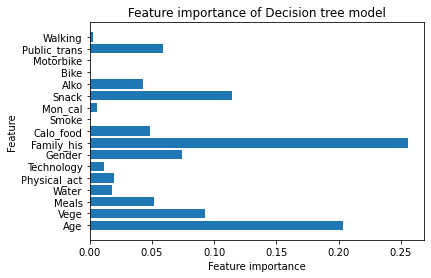

In [52]:
# plot the feature importance of the decision tree model
plot_feature_importance(dt, X, X_names)

<div style='background-color:#ccfff5; font-size:18px;padding:20px;line-height: 1.6'>
    <p> The Decision tree tuning gave us the combination of max_depth=11 and max_features=15 as the most optimal, using almost the maximum values we allowed. The accuracy of the model on the training and test sets is 74% and 70%, respectively. The MSE of the Decision tree model is 18.50. We can conclude that the model is already performing worse than the SVM model while it's also slightly overfitting on the training model. Therefore there's no need to increase the maximum depth parameter even more which would improve the model accuracy most likely but increase the overfitting at the same time. </p>
    <p>From the feature importance we see again that also for the Decision tree algorithm the Family history and Age are among the most relevant features in the prediction process.</p></div>

### Random Forest

Random forest was the best performing model in the default settings selection. In this part we try several options for its parameters n_estimators, max_depth and max_features using the GridSearch function again to see which combination gives us the best performance.

In [53]:
# create a dictionary of the parameter grid for the n_estimators, max_depth and max_features parameters
param_rf = {'n_estimators': [200,300,400,500],
            'max_depth': [i for i in range(1,20,2)],
            'max_features': [i for i in range(1, X_train.shape[1])]}

# create the GridSearchCV model for the Random forest algorithm
grid_search_rf = GridSearchCV(RandomForestRegressor(n_jobs=-1, random_state=33),
                              param_grid=param_rf, n_jobs=-1, cv=5)

# fit the model to the train data with the selected features and target
grid_search_rf.fit(X_train, y_train)

# print the best score from the grid search, the model's score of the test data and best parameters combination
print(f"Best parameters: {grid_search_rf.best_params_}")
print(f"Best cross-validation score: {grid_search_rf.best_score_:.2f}")
print(f"Test score: {grid_search_rf.score(X_test, y_test):.2f}")

# predict the target values of the test data and print the MSE of the prediction and the actual target values
y_pred = grid_search_rf.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")

Best parameters: {'max_depth': 17, 'max_features': 5, 'n_estimators': 400}
Best cross-validation score: 0.86
Test score: 0.86
MSE: 8.80


<div style='background-color:#ccfff5; font-size:18px;padding:20px;line-height: 1.6'> The Random forest model tuning gave us the combination of n_estimators=400, max_depth=17 and max_features=5 as the most optimal. The accuracy of the model on the training and test sets is 86% and 86%, respectively. The MSE of the Random forest model is 8.80. The Random forest significantly outperformed all other models while avoiding any overfitting and shown to be the best solution for the regression prediction part of our dataset.</div>

# Supervised learning - Classification models

## Model Selection

In [54]:
X_train, X_test, y_train, y_test = train_test_split (X, Y_cls)

In [55]:
print(X_train.shape)
print(y_train.shape)

(1583, 17)
(1583,)


In [56]:
classifiers = [
    KNeighborsClassifier(n_neighbors = 5),
    SVC(kernel="rbf", C=0.025, probability=True),
    LogisticRegression(C=0.01, max_iter = 1000, penalty = 'l2',multi_class='ovr')]
scaler = MinMaxScaler()
for classifier in classifiers:
    pipe = Pipeline(steps=[('scalar', scaler), ('classifier', classifier)])
    acc_score = cross_val_score(pipe,X, Y_cls, cv=5).mean()
    print(f"model {classifier} score: {acc_score}")
classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()]
for classifier in classifiers:
    acc_score = cross_val_score(classifier,X, Y_cls, cv=5).mean()
    print(f"model {classifier} score: {acc_score}")

model KNeighborsClassifier() score: 0.68362520027338
model SVC(C=0.025, probability=True) score: 0.3604920842996874
model LogisticRegression(C=0.01, max_iter=1000, multi_class='ovr') score: 0.46426114528363194
model DecisionTreeClassifier() score: 0.7314880172095055
model RandomForestClassifier() score: 0.7930971507960518
model AdaBoostClassifier() score: 0.35865461104948854
model GradientBoostingClassifier() score: 0.740975653479435


<div style='background-color:#ccfff5; font-size:18px;padding:20px;line-height: 1.6'> The models that give the high score are KNeighbor, DecisionTree, RandomForest and GradientBoosting. In the section below, we will use these four models to analyze the classfication of obesity dataset. </div>

### K-neigbors Classifier

![image](https://www.kdnuggets.com/wp-content/uploads/rapidminer-knn-image1.jpg)

In [57]:
possible_k= range(1,15)
for k in possible_k:
    pipe = Pipeline([('preprocessing', MinMaxScaler()),
                     ('classifier',KNeighborsClassifier(n_neighbors= k,weights = 'distance',metric="euclidean" ))])
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores=accuracy_score(y_test,y_pred)
    print (f"{k}--- Accuracy Scores :", scores)

1--- Accuracy Scores : 0.7253787878787878
2--- Accuracy Scores : 0.7234848484848485
3--- Accuracy Scores : 0.7462121212121212
4--- Accuracy Scores : 0.7443181818181818
5--- Accuracy Scores : 0.7329545454545454
6--- Accuracy Scores : 0.7367424242424242
7--- Accuracy Scores : 0.7386363636363636
8--- Accuracy Scores : 0.7329545454545454
9--- Accuracy Scores : 0.740530303030303
10--- Accuracy Scores : 0.7291666666666666
11--- Accuracy Scores : 0.7234848484848485
12--- Accuracy Scores : 0.7234848484848485
13--- Accuracy Scores : 0.7178030303030303
14--- Accuracy Scores : 0.7178030303030303


k = 4 will perform the best for this model

In [77]:
pipe = Pipeline([('preprocessing', MinMaxScaler()), ('classifier',KNeighborsClassifier(n_neighbors = 4,
                                                        weights = 'distance',metric="euclidean" ))])
pipe.fit(X_train, y_train)
pipe_pred = pipe.predict(X_test)
print(confusion_matrix(pipe_pred, y_test))
scores = cross_val_score(pipe, X_train, y_train, cv = KFold(n_splits = 5))
print('Mean score: {:.2f}'.format(scores.mean()))
print('-----------------------------------------------------')
print(classification_report(y_test, pipe_pred))

[[60 17  4  4  2  0  0]
 [ 2 31 11  2  4  0  0]
 [ 2  6 42  9  6  0  0]
 [ 1  7  6 42  8  1  0]
 [ 1  7  9  6 70  3  1]
 [ 0  3  2  4  4 58  0]
 [ 1  0  2  0  0  0 90]]
Mean score: 0.71
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.69      0.90      0.78        67
           1       0.62      0.44      0.51        71
           2       0.65      0.55      0.60        76
           3       0.65      0.63      0.64        67
           4       0.72      0.74      0.73        94
           5       0.82      0.94      0.87        62
           6       0.97      0.99      0.98        91

    accuracy                           0.74       528
   macro avg       0.73      0.74      0.73       528
weighted avg       0.74      0.74      0.74       528



- The recall returns the proportion of positive values correctly predicted.
- The f1-score is the harmonic mean of precision and recall. It is often used to compare classifiers.
- The accuracy returns the proportion of correct predictions.

<div style='background-color:#ccfff5; font-size:18px;padding:20px;line-height: 1.6'> The KNeigborClassifier will perform the best with k=4 and the accuracy is 75% and it improved in comparison to k=5 from the beginning (68% accuracy) </div>

### Decision Tree

In [59]:
params = { 'criterion': ['gini', 'entropy'],
             'max_depth': [5,10,15,20, 25, 30]} 

In [60]:
grid = GridSearchCV(DecisionTreeClassifier(), param_grid=params, n_jobs=-1, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20, 25, 30]})

In [61]:
print('Best params: {}'.format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best params: {'criterion': 'gini', 'max_depth': 15}
Best cross-validation score: 0.73


In [78]:
dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 30)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(confusion_matrix(y_pred, y_test))
print('-----------------------------------------------------')
print(classification_report(y_test, y_pred))

[[60 12  1  1  1  1  0]
 [ 6 34 13  3  9  0  0]
 [ 0  4 44  6  1  0  0]
 [ 0  8  8 49 11  5  0]
 [ 0 10  5  4 70  4  0]
 [ 1  3  5  4  2 52  0]
 [ 0  0  0  0  0  0 91]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        67
           1       0.52      0.48      0.50        71
           2       0.80      0.58      0.67        76
           3       0.60      0.73      0.66        67
           4       0.75      0.74      0.75        94
           5       0.78      0.84      0.81        62
           6       1.00      1.00      1.00        91

    accuracy                           0.76       528
   macro avg       0.75      0.75      0.75       528
weighted avg       0.76      0.76      0.75       528



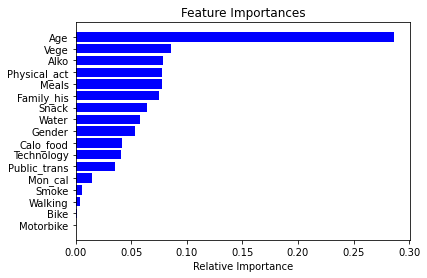

In [63]:
features = X_names
importances = dt.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Random Forest

In [64]:
rdf = RandomForestClassifier(random_state=42)
rdf.fit(X_train, y_train)
print(rdf.score(X_train, y_train))
print(rdf.score(X_test, y_test))

0.9962097283638661
0.8106060606060606


In [65]:
param_grid = {
    'max_depth': [5,10,15,20],
    'n_estimators': [200, 300]}

In [66]:
grid = GridSearchCV(rdf, param_grid=param_grid, n_jobs=-1, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'n_estimators': [200, 300]})

In [67]:
print('Best params: {}'.format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best params: {'max_depth': 15, 'n_estimators': 300}
Best cross-validation score: 0.80


In [79]:
rdf = RandomForestClassifier(random_state=42, max_depth = 20, n_estimators = 300)
rdf.fit(X_train, y_train)
y_pred = rdf.predict(X_test)
print(confusion_matrix(y_pred, y_test))
print('Accuracy on test set: {:.2f}'.format(accuracy_score(y_pred, y_test)))
print('-----------------------------------------------------')
print(classification_report(y_test, y_pred))

[[64  9  1  3  1  0  0]
 [ 2 47  9  1  5  1  0]
 [ 1  0 50  4  2  0  0]
 [ 0  7  5 47  8  1  0]
 [ 0  6  8  4 75  1  0]
 [ 0  2  3  8  3 59  0]
 [ 0  0  0  0  0  0 91]]
Accuracy on test set: 0.82
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.96      0.88        67
           1       0.72      0.66      0.69        71
           2       0.88      0.66      0.75        76
           3       0.69      0.70      0.70        67
           4       0.80      0.80      0.80        94
           5       0.79      0.95      0.86        62
           6       1.00      1.00      1.00        91

    accuracy                           0.82       528
   macro avg       0.81      0.82      0.81       528
weighted avg       0.82      0.82      0.82       528



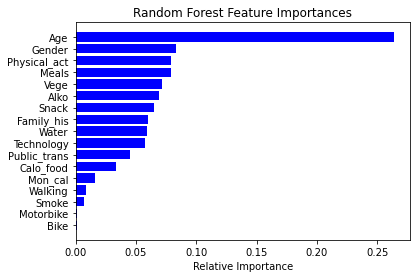

In [80]:
features = X_names
importances = rdf.feature_importances_
indices = np.argsort(importances)

plt.title('Random Forest Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In comparison to the feature importances of Decision Tree: 
- the Smoke, Motorbike and Bike are also the least important features.
- Age is the most important feature
- Other features are the same but with different hierarchy

### Gradient Boosting

![image](https://miro.medium.com/max/1400/1*1GBixkRsnfoiKIdCYMdPvA.png)

In [73]:
grbt = GradientBoostingClassifier(random_state = 0)
param_grid = {'learning_rate':[0.1,0.01,0.001],
            'n_estimators':[200, 300],
            'max_depth':[2,3,4,5]}
grid = GridSearchCV(grbt, param_grid=param_grid, n_jobs=-1, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [200, 300]})

In [74]:
print('Best params: {}'.format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best cross-validation score: 0.77


In [81]:
grdt = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 4, n_estimators = 200)
grdt.fit(X_train, y_train)
y_pred = grdt.predict(X_test)
print(confusion_matrix(y_pred, y_test))
print('Accuracy on test set: {:.2f}'.format(accuracy_score(y_pred, y_test)))
print('-----------------------------------------------------')
print(classification_report(y_test, y_pred))

[[63  7  0  1  2  0  0]
 [ 2 48  6  2  5  1  0]
 [ 2  3 51  5  5  1  0]
 [ 0  6  9 44  8  4  0]
 [ 0  5  8  6 70  1  0]
 [ 0  2  2  9  3 55  0]
 [ 0  0  0  0  1  0 91]]
Accuracy on test set: 0.80
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        67
           1       0.75      0.68      0.71        71
           2       0.76      0.67      0.71        76
           3       0.62      0.66      0.64        67
           4       0.78      0.74      0.76        94
           5       0.77      0.89      0.83        62
           6       0.99      1.00      0.99        91

    accuracy                           0.80       528
   macro avg       0.79      0.80      0.79       528
weighted avg       0.80      0.80      0.80       528



# Semi-supervised learning

In [82]:
strat = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=5)
for train_index, test_index in strat.split(X, Y_cls):
    Xs_train, Xs_test = X[train_index], X[test_index]
    ys_train, ys_test = Y_cls[train_index], Y_cls[test_index]

In [83]:
Xs_train.shape

(1688, 17)

## Limited label data

In [84]:
label = 100
pipe = Pipeline([("scaler", MinMaxScaler()),
                 ("logreg", LogisticRegression(C=10, max_iter = 2000, penalty = 'l2'))])
pipe.fit(Xs_train[:label],ys_train[:label])
print('Score on test set: {:.2f}'.format(pipe.score(Xs_test, ys_test)))

Score on test set: 0.52


With only 100 labels, the score is low with 52%.

## Representative sample

In this part, the representative sample need to be found using Kmeans. We used inertia score to find the best k.

In [85]:
inertia = []
for k in range(5, 20):
    kmeans = KMeans(n_clusters=k, random_state=5)
    kmeans.fit(Xs_train)
    inertia.append(kmeans.inertia_)

In [86]:
k = np.argmin(inertia)
k

14

In [87]:
k=14
kmeans=KMeans(n_clusters=k, random_state=42)
X_dist=kmeans.fit_transform(Xs_train)
representative_idx=np.argmin(X_dist,axis=0)
X_rep=Xs_train[representative_idx]

In [88]:
X_dist

array([[ 2.12029336, 13.62029027,  4.03328771, ...,  1.2139064 ,
         4.31600712,  6.7034686 ],
       [ 3.73100067, 18.18986614,  2.11524454, ...,  5.45436035,
         2.8007482 ,  3.05756269],
       [ 5.1947425 , 20.08125885,  2.85049387, ...,  6.99525905,
         3.66295779,  2.05474889],
       ...,
       [ 2.11128352, 16.66964963,  1.55416262, ...,  3.89546815,
         2.56471019,  3.73741781],
       [ 2.58343238, 14.155144  ,  3.80396231, ...,  2.16108283,
         4.15544143,  6.45122093],
       [ 1.20374977, 15.10964254,  2.81962791, ...,  2.64332002,
         3.25465866,  5.1784327 ]])

In [89]:
X_rep.shape

(14, 17)

In [90]:
y_rep=ys_train[representative_idx]
y_rep

array([2, 4, 6, 5, 3, 6, 4, 3, 3, 4, 5, 5, 2, 4])

In [91]:
pipe = Pipeline([("scaler", MinMaxScaler()),
                 ("logreg", LogisticRegression(C=10, max_iter = 2000, penalty = 'l2'))])
pipe.fit(X_rep, y_rep)
print('Score on test set: {:.4f}'.format(pipe.score(Xs_test, ys_test)))

Score on test set: 0.3073


## Give labels to other instances in the same cluster

In [92]:
y_train_label=np.empty(len(Xs_train))

In [93]:
for i in range(k):
    y_train_label[kmeans.labels_==i]=y_rep[i]

In [94]:
pipe = Pipeline([("scaler", MinMaxScaler()),
                 ("logreg", LogisticRegression(C=10, max_iter = 2000, penalty = 'l2'))])
pipe.fit(Xs_train,y_train_label)
print('Score on test set: {:.4f}'.format(pipe.score(Xs_test, ys_test)))

Score on test set: 0.3593


## Propagating the label to the 20 percentile closest to the centroid

In [95]:
percentile = 20

X_cluster_distance=X_dist[np.arange(len(Xs_train)),kmeans.labels_]

for i in range(14):
    intra_cluster=(kmeans.labels_==i)
    cluster_dist=X_cluster_distance[intra_cluster]
    distance=np.percentile(cluster_dist,percentile)
    above_distance=(X_cluster_distance>distance)
    X_cluster_distance[intra_cluster& above_distance]=-1

In [96]:
partial_select=(X_cluster_distance!=-1)

In [97]:
X_train_selected=Xs_train[partial_select]
y_train_selected=ys_train[partial_select]

In [98]:
pipe = Pipeline([("scaler", MinMaxScaler()),
                 ("logreg", LogisticRegression(C=10, max_iter = 2000, penalty = 'l2'))])
pipe.fit(X_train_selected,y_train_selected)
print('Score on test set: {:.4f}'.format(pipe.score(Xs_test, ys_test)))

Score on test set: 0.5130


<div style='background-color:#ccfff5; font-size:18px;padding:20px;line-height: 1.6'> The score on test set improved when propating the label to 20 percentile. However, the model or k still need to carefully consider again as the score is still low. </div>

# Unsupervised learning

In this part, we aims to classify to around balanced 7 groups as original dataset have balanced target variable.
- We try first to either scale, reduce dimensions, remove outliners. 
- After that, we plot basing on 2 dimensions data tranformed from TSNE  to select the suitable clustering methods. 
- Apply clustering methods and tuning parameters give us the best possible clustering. 
- Finally, we apply classifcation on the best clustering method.

## Feature selection

### Classification all categorical variable --> Y_cls

In [99]:
X_ca=X[:,1:]
X_ca_names=X_names[1:]

In [100]:
chi2,pval=feature_selection.chi2(X_ca,Y_cls)

In [101]:
pval<0.05

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [102]:
chi2

array([ 61.1691452 ,  34.62941057,  23.80971639,  78.57800744,
        30.96904092, 324.97835865, 113.43537784,  27.08129767,
        31.46797672, 117.42925431,  76.27328869,  67.67752222,
        14.98734238,  19.31647735,  37.76144964,  99.25306084])

### Variance thredhold for unsupervised learning

In [103]:
varThres=feature_selection.VarianceThreshold(threshold=0.01)
X_select=varThres.fit_transform(X) 
varThres.variances_

array([40.25223644,  0.3407838 ,  0.65527102,  0.4739672 ,  0.80147189,
        0.45407232,  0.24996494,  0.14911628,  0.10258911,  0.02040876,
        0.043408  ,  0.21942899,  0.26561237,  0.00330497,  0.00518365,
        0.18826741,  0.02582399])

In [104]:
X_select.shape, X.shape

((2111, 15), (2111, 17))

## MinMaxScaler

In [105]:
scale=MinMaxScaler()
X_scale=scale.fit_transform(X)

## PCA

In [106]:
pca=PCA(n_components=0.99,random_state=40)
full_pca=pca.fit_transform(X_scale)
full_recover=pca.inverse_transform(full_pca)

## detect outliners

(2080, 15)

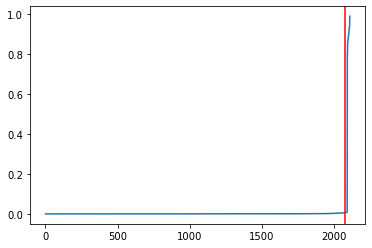

In [107]:
MSE_score = ((X_scale-full_recover)**2).sum(axis=1)

MSE_score.sort()

plt.plot(MSE_score)
plt.axvline(2080,c='r')

thredhold=MSE_score[2080]
thredhold
MSE_score = ((X_scale-full_recover)**2).sum(axis=1)
full_noout=full_pca[np.argwhere(MSE_score<thredhold).flatten()]
full_noout.shape

As discussed in the EDA part, we do not have many outliners in our data. That is why the graph show at the end only few points MSE are high. We removed 31 outliner points.

## TSNE

Text(0.5, 1.0, 'TSNE_all features scaled & pca & remove outliners')

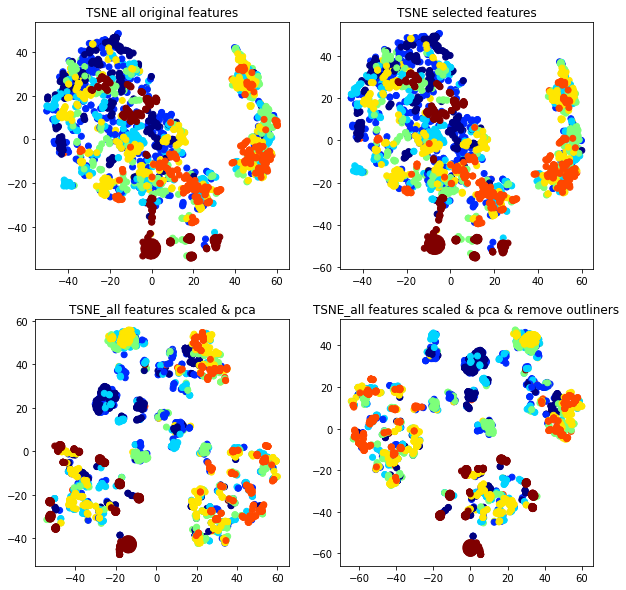

In [108]:
tsne=TSNE(n_components=2,random_state=40)
x_reduce=tsne.fit_transform(X)

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.scatter(x_reduce[:,0],x_reduce[:,1],c=Y_cls,cmap="jet")
plt.title('TSNE all original features')

tsne=TSNE(n_components=2,random_state=40)
x_reduce=tsne.fit_transform(X_select)
plt.subplot(222)
plt.scatter(x_reduce[:,0],x_reduce[:,1],c=Y_cls,cmap="jet")
plt.title('TSNE selected features')

tsne=TSNE(n_components=2,random_state=40)
x_reduce=tsne.fit_transform(full_pca)
plt.subplot(223)
plt.scatter(x_reduce[:,0],x_reduce[:,1],c=Y_cls,cmap="jet")
plt.title('TSNE_all features scaled & pca')

tsne=TSNE(n_components=2,random_state=40)
x_reduce=tsne.fit_transform(full_noout)
plt.subplot(224)
plt.scatter(x_reduce[:,0],x_reduce[:,1],c=Y_cls[np.argwhere(MSE_score<thredhold).flatten()],cmap="jet")
plt.title('TSNE_all features scaled & pca & remove outliners')

<div style='background-color:#ccfff5; font-size:18px;padding:20px;line-height: 1.6'>It is better to use all features with scaled data. Clustering methods can be "Gaussian Mixture" or "K-Means". Since colors are overlapped, clustering is likely very challenging.</div>

In [109]:
tsne=TSNE(n_components=2,random_state=40)
x_reduce=tsne.fit_transform(X_scale)

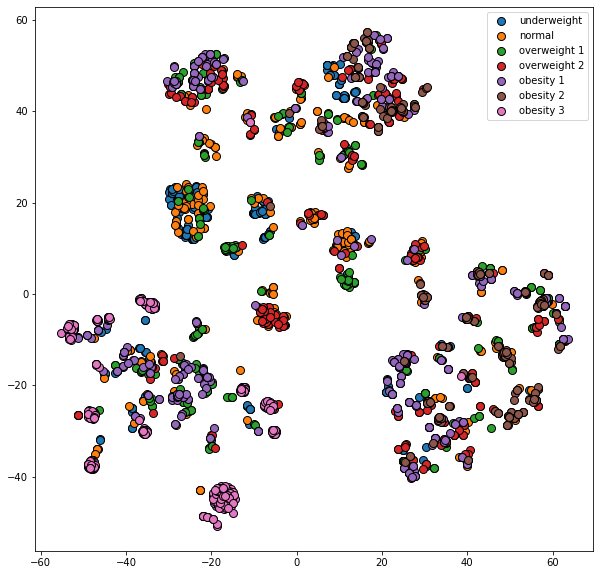

In [110]:
plt.figure(figsize=(10,10))
plt.plot(x_reduce[:, 0][Y_cls==0], x_reduce[:, 1][Y_cls==0], 'o',
             markeredgecolor='k', markersize=8,label='underweight')
plt.plot(x_reduce[:, 0][Y_cls==1], x_reduce[:, 1][Y_cls==1], 'o',
             markeredgecolor='k', markersize=8,label='normal')
plt.plot(x_reduce[:, 0][Y_cls==2], x_reduce[:, 1][Y_cls==2], 'o',
             markeredgecolor='k', markersize=8,label='overweight 1')
plt.plot(x_reduce[:, 0][Y_cls==3], x_reduce[:, 1][Y_cls==3], 'o',
             markeredgecolor='k', markersize=8,label='overweight 2')
plt.plot(x_reduce[:, 0][Y_cls==4], x_reduce[:, 1][Y_cls==4], 'o',
             markeredgecolor='k', markersize=8, label='obesity 1')
plt.plot(x_reduce[:, 0][Y_cls==5], x_reduce[:, 1][Y_cls==5], 'o',
             markeredgecolor='k', markersize=8, label='obesity 2')
plt.plot(x_reduce[:, 0][Y_cls==6], x_reduce[:, 1][Y_cls==6], 'o',
             markeredgecolor='k', markersize=8, label='obesity 3')
plt.legend()

<div style='background-color:#ccfff5; font-size:18px;padding:20px;line-height: 1.6'>This plot gives views of how colors matches with real labels (obesity) classes. It reveals a potential for clustering/classifying Obesity type III. However, overall, potentiality for clustering is poor.</div>

## Gaussian Mixture

### all features

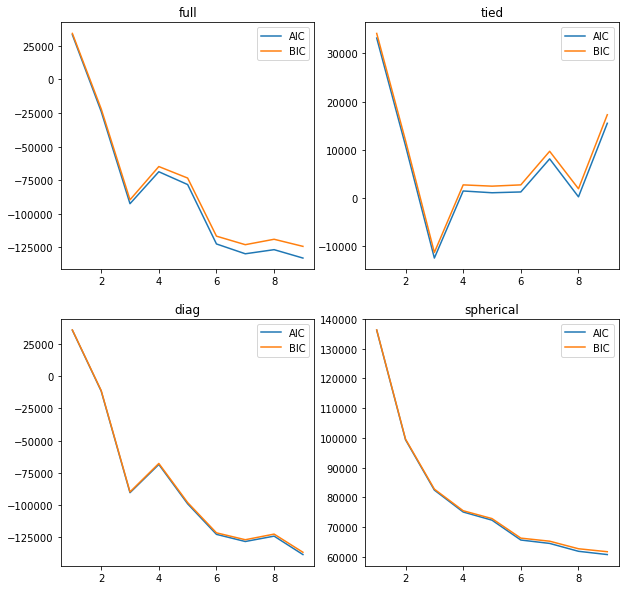

In [111]:
n_components = np.arange(1, 10, 1)
cova=['full', 'tied', 'diag', 'spherical']
plt.figure(figsize=(10,10))
for i in range(1,5):
    models = [GaussianMixture(n, covariance_type=cova[i-1], random_state=0)
              for n in n_components]
    aics = [model.fit(X).aic(X) for model in models]
    bics = [model.fit(X).bic(X) for model in models]
    
    plt.subplot(220+i)
    plt.plot(n_components, aics, label='AIC');
    plt.plot(n_components, bics,label='BIC');
    plt.title(cova[i-1])
    plt.legend()


<div style='background-color:#ccfff5; font-size:18px;padding:20px;line-height: 1.6'> Covariance type "full" is the best compared with other types of covariance. Cluster 7 is the best choice.</div>

In [112]:
gm=GaussianMixture(7, covariance_type='full', random_state=0)
gm.fit(X)

gm.converged_

True

In [113]:
for i in np.unique(gm.predict(X)):
    print(f'label {i}: {X[gm.predict(X)==i].shape[0]} times {np.unique(X[gm.predict(X)==i],axis=0).shape[0]} unique rows')

label 0: 641 times 539 unique rows
label 1: 50 times 50 unique rows
label 2: 134 times 132 unique rows
label 3: 20 times 20 unique rows
label 4: 428 times 425 unique rows
label 5: 186 times 182 unique rows
label 6: 652 times 613 unique rows


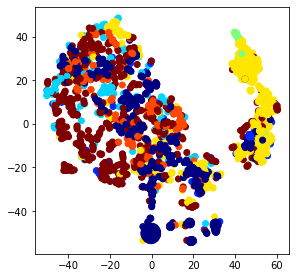

In [114]:
tsne=TSNE(n_components=2,random_state=40)
x_reduce=tsne.fit_transform(X)
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.scatter(x_reduce[:,0],x_reduce[:,1],c=gm.predict(X),cmap="jet")

### all features + minmax scale

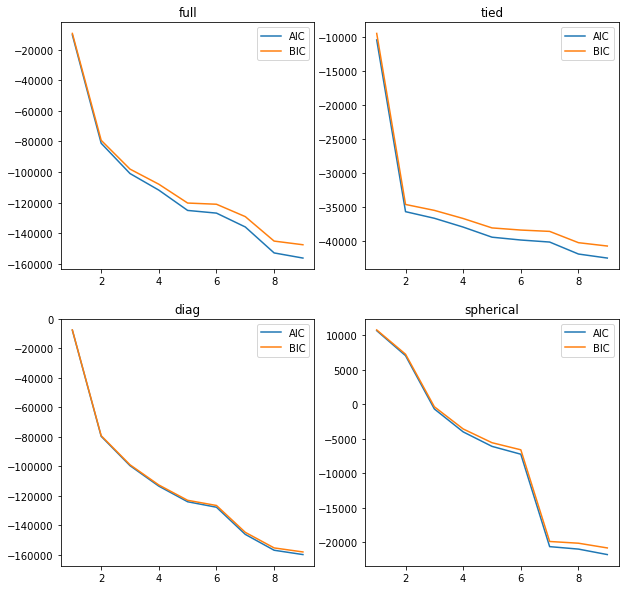

In [115]:
n_components = np.arange(1, 10, 1)
cova=['full', 'tied', 'diag', 'spherical']
plt.figure(figsize=(10,10))
for i in range(1,5):
    models = [GaussianMixture(n, covariance_type=cova[i-1], random_state=0)
              for n in n_components]
    aics = [model.fit(X_scale).aic(X_scale) for model in models]
    bics = [model.fit(X_scale).bic(X_scale) for model in models]
    
    plt.subplot(220+i)
    plt.plot(n_components, aics, label='AIC');
    plt.plot(n_components, bics,label='BIC');
    plt.title(cova[i-1])
    plt.legend()

<div style='background-color:#ccfff5; font-size:18px;padding:20px;line-height: 1.6'> Covariance type "diag" is the best compared with other types of covariance. Cluster 7 is the best choice.</div>

In [116]:
gm1=GaussianMixture(7, covariance_type='diag', random_state=0)
gm1.fit(X_scale)
y_clusters=gm.predict(X_scale)
np.unique(gm.predict(X_scale))

gm.converged_

True

In [117]:
for i in np.unique(gm1.predict(X_scale)):
    print(f'label {i}: {X_scale[gm1.predict(X_scale)==i].shape[0]} times {np.unique(X_scale[gm1.predict(X_scale)==i],axis=0).shape[0]} unique rows')

label 0: 615 times 587 unique rows
label 1: 308 times 304 unique rows
label 2: 86 times 86 unique rows
label 3: 234 times 212 unique rows
label 4: 163 times 163 unique rows
label 5: 136 times 134 unique rows
label 6: 569 times 475 unique rows


<mark> the best option =)

Text(0.5, 1.0, 'TSNE all original features')

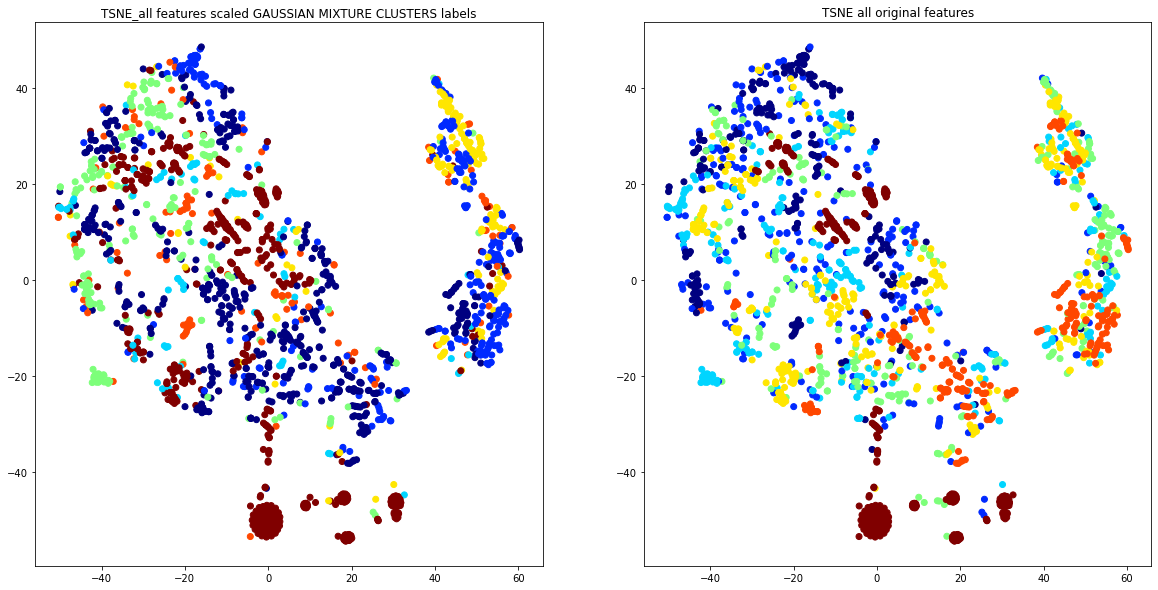

In [118]:
tsne=TSNE(n_components=2,random_state=40)
x_reduce=tsne.fit_transform(X)
tsne1=TSNE(n_components=2,random_state=40)
x_reduce1=tsne.fit_transform(X)
#--------

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.scatter(x_reduce[:,0],x_reduce[:,1],c=gm1.predict(X_scale),cmap="jet")
plt.title('TSNE_all features scaled GAUSSIAN MIXTURE CLUSTERS labels')

plt.subplot(122)
plt.scatter(x_reduce1[:,0],x_reduce1[:,1],c=Y_cls,cmap="jet")
plt.title('TSNE all original features')

<div style='background-color:#ccfff5; font-size:18px;padding:20px;line-height: 1.6'> Compare between data with clustering labels and original labels, we can see some level of similar pattern of colors. If you compare with K-Mean (in the below part), Gaussian Mixture is better. Notice that in reality, we may not have original labels to compare</div>

## Bayesian GaussianMixture

In [119]:
bgm=BayesianGaussianMixture(n_components=10,n_init=10,random_state=42)
bgm.fit(X)

BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

In [120]:
mask=np.round(bgm.weights_,2)>0
labels=np.unique(bgm.predict(X))[mask]  # chosen clusters' labels.

In [121]:
for i in labels:
    print(f'label {i}: {X[bgm.predict(X)==i].shape[0]} times {np.unique(X[bgm.predict(X)==i],axis=0).shape[0]} unique rows')

label 0: 641 times 539 unique rows
label 2: 12 times 11 unique rows
label 3: 732 times 713 unique rows
label 4: 32 times 32 unique rows
label 5: 29 times 29 unique rows
label 6: 457 times 431 unique rows
label 8: 82 times 81 unique rows
label 9: 114 times 113 unique rows


## K-Means

In [122]:
kmeans=KMeans() # baseline k=8
all_dis=kmeans.fit_transform(X)  # on selected features

In [123]:
kmeans.inertia_

9800.120094979682

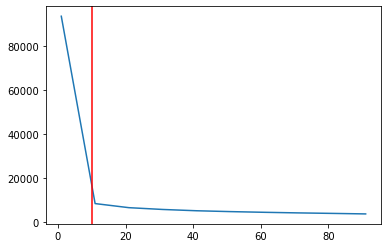

In [124]:
I=[]
for i in np.arange(1,100,10): 
    kmeans=KMeans(n_clusters=i) # baseline k=8
    kmeans.fit(X)
    I.append(kmeans.inertia_)

plt.plot(np.arange(1,100,10),I)
plt.axvline(10,c='r')

In [125]:
kmeans=KMeans(n_clusters=7) 
all_dis=kmeans.fit_transform(X)  # on selected features
print(silhouette_score(X,kmeans.labels_))

0.25920316990721515


In [126]:
for i in np.unique(kmeans.labels_):
    print(f'label {i}: {X[kmeans.labels_==i].shape[0]} times {np.unique(X[kmeans.labels_==i],axis=0).shape[0]} unique rows')

label 0: 387 times 376 unique rows
label 1: 150 times 150 unique rows
label 2: 252 times 252 unique rows
label 3: 361 times 276 unique rows
label 4: 14 times 14 unique rows
label 5: 466 times 436 unique rows
label 6: 481 times 457 unique rows


Text(0.5, 1.0, 'TSNE all original features')

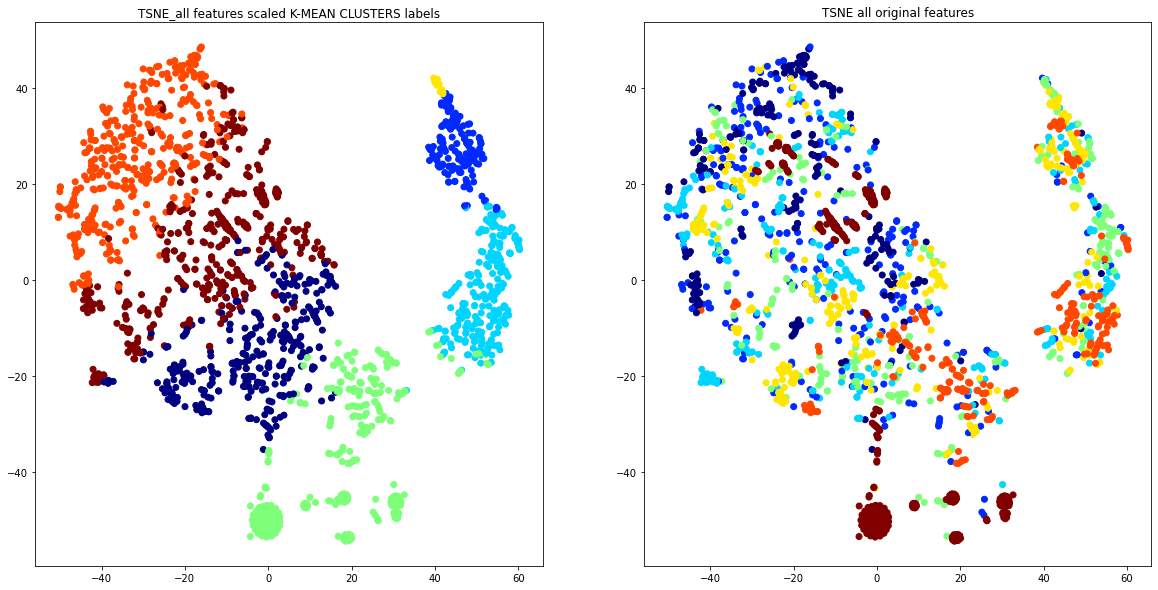

In [127]:
tsne=TSNE(n_components=2,random_state=40)
x_reduce=tsne.fit_transform(X)

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.scatter(x_reduce[:,0],x_reduce[:,1],c=kmeans.predict(X),cmap="jet")
plt.title('TSNE_all features scaled K-MEAN CLUSTERS labels')

plt.subplot(122)
plt.scatter(x_reduce1[:,0],x_reduce1[:,1],c=Y_cls,cmap="jet")
plt.title('TSNE all original features')

<div style='background-color:#ccfff5; font-size:18px;padding:20px;line-height: 1.6'> K-Mean fails to catch the pattern of  original labels, even it looks like group the data well. </div>

## Clustering selection

In [128]:
print('GAUSSIAN MIXTURE ON ORIGINAL FEATURES')
for i in np.unique(gm.predict(X)):
    print(f'label {i}: {X[gm.predict(X)==i].shape[0]} times {np.unique(X[gm.predict(X)==i],axis=0).shape[0]} unique rows')
print('-----------------------------------------------------------------------------------------')
print('GAUSSIAN MIXTURE ON SCALED FEATURES')
for i in np.unique(gm1.predict(X_scale)):
    print(f'label {i}: {X_scale[gm1.predict(X_scale)==i].shape[0]} times {np.unique(X_scale[gm1.predict(X_scale)==i],axis=0).shape[0]} unique rows')
print('-----------------------------------------------------------------------------------------')
print('KMEANS ON ORIGINAL FEATURES')
for i in np.unique(kmeans.labels_):
    print(f'label {i}: {X[kmeans.labels_==i].shape[0]} times {np.unique(X[kmeans.labels_==i],axis=0).shape[0]} unique rows')
print('-----------------------------------------------------------------------------------------')    
print('BAYESSIAN GAUSSIAN MIXTURE ON ORIGINAL FEATURES')
for i in labels:
    print(f'label {i}: {X[bgm.predict(X)==i].shape[0]} times {np.unique(X[bgm.predict(X)==i],axis=0).shape[0]} unique rows')

GAUSSIAN MIXTURE ON ORIGINAL FEATURES
label 0: 641 times 539 unique rows
label 1: 50 times 50 unique rows
label 2: 134 times 132 unique rows
label 3: 20 times 20 unique rows
label 4: 428 times 425 unique rows
label 5: 186 times 182 unique rows
label 6: 652 times 613 unique rows
-----------------------------------------------------------------------------------------
GAUSSIAN MIXTURE ON SCALED FEATURES
label 0: 615 times 587 unique rows
label 1: 308 times 304 unique rows
label 2: 86 times 86 unique rows
label 3: 234 times 212 unique rows
label 4: 163 times 163 unique rows
label 5: 136 times 134 unique rows
label 6: 569 times 475 unique rows
-----------------------------------------------------------------------------------------
KMEANS ON ORIGINAL FEATURES
label 0: 387 times 376 unique rows
label 1: 150 times 150 unique rows
label 2: 252 times 252 unique rows
label 3: 361 times 276 unique rows
label 4: 14 times 14 unique rows
label 5: 466 times 436 unique rows
label 6: 481 times 457 uni

<div style='background-color:#ccfff5; font-size:18px;padding:20px;line-height: 1.6'> 
    <p>Remember our goals at the begining of the unsupervised learning, we try to find clustering method that give balanced labels that are close to 7 clusters. These crietia can be judged via total number of labels, number of times (= number of observations in a cluster). Besides, the homogeneity level within a cluster is consider important, which will be measure by looking at the unique rows in a label.</p>
    <br>
    <p> Basing on above mentioned metrics and looking at the result showed above, we can conclude that GAUSSIAN MIXTURE ON SCALED FEATURES is the best method.</p>
    <br>
     <p> The plot in each part comparing between data with clustering label vs data with original labels also lead to the same conclusion. However, in unsupervised learning, we do not know the orginal labels.</p>
</div>

## Clasification model

In [129]:
classifiers = [
    KNeighborsClassifier(n_neighbors = 5),
    SVC(kernel="rbf", C=0.025, probability=True),
    LogisticRegression(C=0.01, max_iter = 1000, penalty = 'l2',multi_class='ovr')]
scaler = MinMaxScaler()
for classifier in classifiers:
    pipe = Pipeline(steps=[('scalar', scaler), ('classifier', classifier)])
    acc_score = cross_val_score(pipe,X, y_clusters, cv=5).mean()
    print(f"model {classifier} score: {acc_score}")
    
    
classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()]
for classifier in classifiers:
    acc_score = cross_val_score(classifier,X, y_clusters, cv=5).mean()
    print(f"model {classifier} score: {acc_score}")

model KNeighborsClassifier() score: 0.9635339988571812
model SVC(C=0.025, probability=True) score: 0.9104702362945784
model LogisticRegression(C=0.01, max_iter=1000, multi_class='ovr') score: 0.8550580932853796
model DecisionTreeClassifier() score: 0.9976325725745913
model RandomForestClassifier() score: 0.9914792780074618
model AdaBoostClassifier() score: 0.9663719987003239
model GradientBoostingClassifier() score: 0.9990532531119403


<div style='background-color:#ccfff5; font-size:18px;padding:20px;line-height: 1.6'>  Running Classification basing on the labels gaining from the best clustering method (Gaussian Mixture on scaled features). Model works quite well with labels from clustering. Ater tested on many models using cross validation 5 folds, SVC and Decision tree based models (Except AdaBoost) seem to be suitable to run.</div>

# Summary and conclusion

**Supervised learning - regression**

To understand the overall algorithms' suitability for our data we used the default settings of the Linear regression, RANSAC, Gradient descent, Supporting vector machine ("SVM"), Decision tree and Random forest models and selected SVM, Decision tree and Random forest for further parameter tuning as these achieved the best scores. The best performance could be achieved with the Random forest model which significantly outperformed other models and reached the 86% accuracy without overfitting on the training set.

**Supervised learning - classification**

We used Kneighbor Classifier, SVC, Logistic Regession, Decision Tree, Random Forest, AdaBoost Classifier, and GradientBoosting to compare the accuracy score without tunning for the model selection. And with the accuracy score higher than 0.7, I chose Kneighbor Classifier, Decision Tree, Random Forest, and Gradient Boosting to continue. After feature scaling and parameters tuning, Random Forsest give the best result with accuracy score reached 84% and also a balanced f1_score between labels. Therefore, Random Forest will be selected among others to be the model prediction for the Obesity Level classification task.

**Semi-supervised learning**

We choose Logistic Regression as the model to work on. With the limited 100 labeled data, the accuracy score is 52%. After finding the representative sample using Kmeans and giving the labels to other instances, the  score decreases to 35%. To improve the score, propagating the label to the 50 percentile closest to the centroid is used and make the improvement with the accuracy score is 57%. However, it is still need further improvement on both Kmeans and model selection as the score is still lower than expected.

**Unsupervised learning**

We try to cluster around 7 balanced groups. We visualize our data using TSNE basing on original data, selected data from feature engineering, scaled and dimension deduction data, removed outliner data. First, we see that using feature engineer or remove outliners in this case do not bring significant impact, and secondly to identify relatively suitable clustering methods: Gaussian Mixture, Bayes Gaussian Mixture, and K-Means. After tuning parameters, Gaussian Mixture with scaled data input is the best option. The best output of clustering works well with SVC and Decision Tree, Random Forest, Gradient Boosting.